In [49]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

1. Scale-dependent prior by Klein, Kneib (2016)

In [151]:
shape = 0.5   #shape parameter
scale =0.0028  # nu (scale)
x = np.linspace(0.0001, 0.01, 500)
pdf_scale = stats.weibull_min.pdf(x, c=shape, scale=scale)

2. Inverse gamma a = 1

In [152]:
alpha = 1  # shape parameter
pdf_ig = stats.invgamma.pdf(x, a=alpha, scale=scale)

In [153]:
def pdf_ig_tausq(tau_sq, theta):
    return theta* tau_sq**(-2)*np.exp(-theta/tau_sq)
pdf_ig = pdf_ig_tausq(x, scale)

3. Half-normal for tau -> gamma for tau^2

In [154]:
pdf_half_normal = stats.gamma.pdf(x, a=shape, scale=scale)

4. Half-Cauchy for tau -> generalise beta prime for tau^2

In [168]:
def generalized_beta_prime_pdf(x, a, b, p):
    # x must be > 0
    # PDF formula (classic form)
    numerator = p * (x**(a*p - 1)) * ((1 + x**p)**(-(a + b)))
    denominator = scipy.special.beta(a, b)
    return numerator / denominator


a, b, p = 1, 1, .1
pdf_half_cauchy = generalized_beta_prime_pdf(x, a, b, p)

(0.0, 400.0)

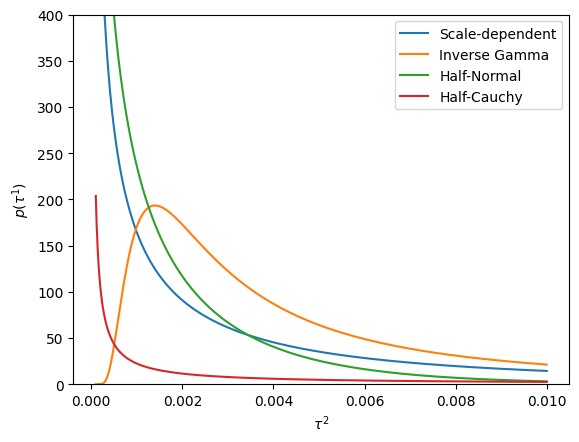

In [169]:
for pdf, label in zip([pdf_scale, pdf_ig, pdf_half_normal, pdf_half_cauchy], ["Scale-dependent", "Inverse Gamma", "Half-Normal", "Half-Cauchy"]):
    plt.plot(x, pdf, label = label)
plt.xlabel(r'$\tau^2$')
plt.ylabel(r"$p(\tau^1)$")
plt.legend()
plt.ylim(0,400)